
# Project: Investigate TMDb Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [52]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

### The very first step of Data Wrangling is Gathering the Data

In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('tmdb_movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08


## Second Step is to Assess the Data

In [54]:
#Check the data table size
df.shape


(10866, 21)

In [55]:
#Checking details of various columns and their data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [56]:
#Check the duplicate values
sum(df.duplicated())


1

In [57]:
# Statistics for numeric data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [58]:
#Check which row is the dulpcate one
print(df.id.shape[0])
df.id.nunique()

10866


10865

## Data Cleaning Step :

In [59]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
#Remove Duplicates
df2=df.drop_duplicates()
sum(df2.duplicated())

0

In [60]:
#Release date format is not uniform so we need to fix this
df2.release_date.dtype
type(df2['release_date'][0])

str

In [61]:
#Convert release_date into datetime format
df2['release_date']=pd.to_datetime(df['release_date'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
# Some of the column is redundant we need to drop them
df2.drop(['budget','revenue','homepage','tagline','keywords','overview','cast','production_companies'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 1.5+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
# Remove Genres Null Values from the dataset
df3=df2.dropna(subset=['genres'],axis=0)
df3.shape[0]

10842

In [64]:
#split the genre column
genre_itr=(set(x.split('|')) for x in df3.genres)
genres=sorted(set.union(*genre_itr))
dummies=pd.DataFrame(np.zeros((len(df3),len(genres))),columns=genres)
for i, gen in enumerate(df3.genres):
    dummies.ix[i, gen.split('|')]=1
df4=df3.join(dummies)    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [65]:
#Now remove the original genres column
df4.drop('genres',axis=1,inplace=True)

In [66]:
budget_mean=df4.budget_adj.mean()
df4['budget_adj']=df4['budget_adj'].replace(0,budget_mean)

In [67]:
revenue_mean=df4.revenue_adj.mean()
df4['revenue_adj']=df4['revenue_adj'].replace(0,revenue_mean)

In [68]:
runtime_mean=df4.runtime.mean()
df4['runtime']=df4['runtime'].replace(0,runtime_mean)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1. Which genres are most popular from year to year?

In [69]:
#Lets analyse this question by seeing trend of top most genres
pop_list=[]
for genre in genres:
    pop=df4.groupby(genre).sum().popularity
    pop_list.append(pop)
    #pop_list.append(genre)
pop_list=pd.DataFrame(pop_list,genres)   
pop_list.columns=['x','popularity']
pop_list.drop('x',axis=1,inplace=True)
pop_list=pop_list.nlargest(10,'popularity')
print(pop_list)    


                  popularity
Drama            2973.548580
Comedy           2455.425043
Thriller         2129.872329
Action           1937.263697
Adventure        1350.530327
Romance          1141.560171
Science Fiction  1041.381302
Crime            1007.223291
Family            922.981324
Horror            827.498928


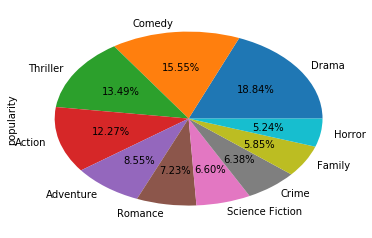

In [70]:
#Showing above result Graphically for better Visualisation
pop_list['popularity'].plot(kind='pie',autopct='%1.2f%%')

### Research Question 2. Which director is most popular?

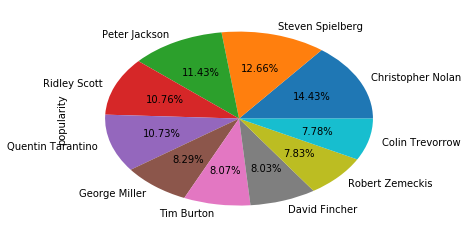

In [71]:
df_pop_dir=df4.groupby('director').sum()
pop_dir=df_pop_dir.nlargest(10,'popularity')
pop_dir['popularity'].plot(kind='pie',autopct='%1.2f%%')

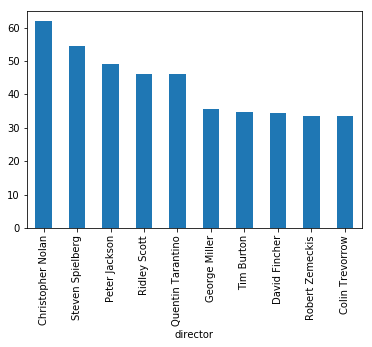

In [72]:
pop_dir['popularity'].plot(kind='bar')

### Research Question 3. Budget Vs Revenue

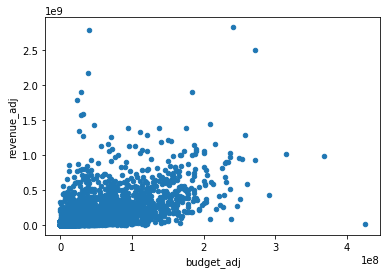

In [73]:
df4.plot(x='budget_adj',y='revenue_adj',kind='scatter')

### Research Question 4. Runtime Vs Popularity

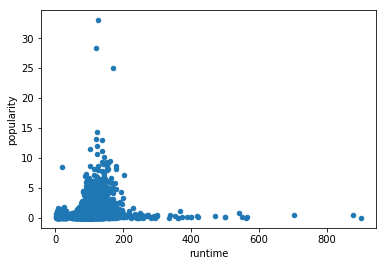

In [74]:
df4.plot(x='runtime',y='popularity',kind='scatter')

### Research Question 5.  What kinds of properties are associated with movies that have high revenues?

In [75]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
print(df4.runtime.mean())
print(df4.vote_count.mean())
df_top5_rev=df4.nlargest(5,'revenue_adj')

102.421061916
217.823648773


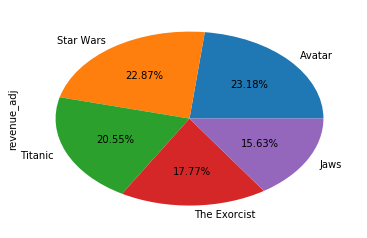

In [76]:
df_top5_rev['revenue_adj'].plot(kind='pie',labels=df_top5_rev['original_title'],autopct='%1.2f%%')

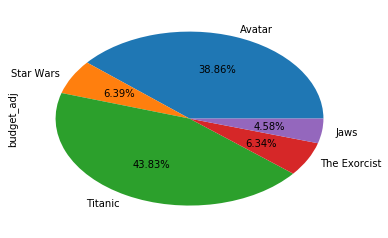

In [77]:
df_top5_rev['budget_adj'].plot(kind='pie',labels=df_top5_rev['original_title'],autopct='%1.2f%%')

<a id='conclusions'></a>
## Conclusions

### Research Question 1: Which genres are most popular from year to year?
#### Conclusion: Dramma is most popular genre over the year.

### Research Question 2. Which director is most popular?
#### Conclusion: By seeing graphical representation of the available data Cristopher Nolan stands out in popularity charts.

### Research Question 3. Budget Vs Revenue.
#### Conclusion: After seeing graphical representation we can not conclude any relationship.

### Research Question 4. Runtime Vs Popularity.
#### Conclusion: After seeing scatter plot we can fairely conclude that less runtime movies are more popular. 

### Research Question 5.  What kinds of properties are associated with movies that have high revenues?
#### Conclusion: 1. Runtime of movies having high revenue is more than average runtime overall.
#### Conclusion: 2. 'Avatar' is having highest gross revenue over the year..

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0